# Data Preprocessing:
##### 1- Checking for missing & special values .
##### 2- Checking for unmatched features' type.
##### 3- Checking for data inconsistensy.
##### 4- Checking for outliers.

# Analysis:

### With Discounted Sales:
##### A1- Correlation between Profit and other features (✅)
##### A2- Total Eranings Total Losses (✅)
##### A3- Average Sales for Earnings and Losses (✅)
##### A4- Average Quantity for Earnings and Losses (✅)
##### A5- Types of Discounts if exist and their distribution (✅)
##### A6- The Relationship between Discount and Earnings and Losses Visually (✅)
##### A7- Category Discounts quantity for each type of percentage (✅)
##### A8- Each Categories Earnings and Losses (✅)
##### A9- Sub-Categories Discounts quantity for each type of percentage (✅)
##### A10- Each Sub-Categories Earnings and Losses (✅)
##### A11- Top 20 Best Branches Earning and Losses (✅) 
##### A12- Top 20 Best Branches Discount Distribution (✅) 
##### A13- Top 20 Best Branches Total Losses due to discount (✅) 
##### A14- Top 20 Best Branches Sub-Categories Earnings and Losses (✅)
##### A15- Top 20 Worest Branches Earning and Losses (✅)
##### A16- Top 20 Worest Branches Discount Distribution (✅)
##### A17- Top 20 worest Branches Total Losses due to discount (✅)
##### A18- Top 20 Worest Branches Sub-Categories Earnings and Losses (✅)

### Without Discounted Sales:
##### B1- Total Eranings Total Losses (✅)
##### B2- Each Categories Earnings and Losses (✅)
##### B3- Each Sub-Categories Earnings and Losses (✅)
##### B4- Top 20 Best Branches Earning and Losses (✅)
##### B5- Top 20 Best Branches Sub-Categories Earnings and Losses (✅)
##### B6- Top 20 Worest Branches Earning and Losses (✅)
##### B7- Top 20 Worest Branches Sub-Categories Earnings and Losses (✅)

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataSetDirectory = os.getcwd() + '/Desktop/databases/SampleSuperstore.csv'

In [3]:
df = pd.read_csv('Downloads/SampleSuperstore.csv')

In [4]:
# function for countplot to  disply each bar count
def bar_label(plot):
    for container in plot.containers:
        return plot.bar_label(container).remove

# Data Cleaning:

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 1- Checking for missing

In [6]:
# Data Preprocessing:
##### 3- Check for data unconsistensy.
##### 4- check for outliers.

In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## 2- Check for unmatched features' type

In [8]:
df.info() # or df.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## 3- Checking for data inconsistency

In [9]:
## should be only 4 classes
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
# country should be only United States since the Supermarket Chain is located there
df['Country'].unique()

array(['United States'], dtype=object)

In [11]:
# Cities should not be less than 2 letters
(df['City'].apply(len).values < 2).sum()
# Result: is 0 which is good

0

In [12]:
# State should not be less than 2 letters
(df['State'].apply(len).values < 2).sum()
# Result: is 0 which is good

0

In [13]:
# Postal code with less than 5 Digits Number
(df['Postal Code'].values < 10000).sum()
# Result: There are 449 POstal Code with less than 5 Digit which is a Data unconsistincy

449

In [14]:
# Rows the Postal Code less than 5 Digits
df[df['Postal Code'].values < 10000]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
185,Standard Class,Consumer,United States,Fairfield,Connecticut,6824,East,Office Supplies,Binders,7.16,2,0.0,3.4368
197,Standard Class,Home Office,United States,Westfield,New Jersey,7090,East,Office Supplies,Storage,46.26,3,0.0,12.0276
267,Standard Class,Consumer,United States,Morristown,New Jersey,7960,East,Office Supplies,Fasteners,7.56,6,0.0,0.3024
298,Standard Class,Corporate,United States,Belleville,New Jersey,7109,East,Office Supplies,Paper,32.40,5,0.0,15.5520
299,Standard Class,Corporate,United States,Belleville,New Jersey,7109,East,Office Supplies,Storage,1082.48,8,0.0,10.8248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,First Class,Corporate,United States,Lakewood,New Jersey,8701,East,Office Supplies,Art,8.94,3,0.0,2.4138
9936,Standard Class,Consumer,United States,Cranston,Rhode Island,2920,East,Office Supplies,Binders,102.93,3,0.0,48.3771
9967,Standard Class,Consumer,United States,Plainfield,New Jersey,7060,East,Office Supplies,Binders,40.20,5,0.0,18.0900
9968,Standard Class,Consumer,United States,Plainfield,New Jersey,7060,East,Office Supplies,Binders,735.98,2,0.0,331.1910


In [15]:
# Postal code with longer than 5 Digits Number
(df['Postal Code'].values > 99999).sum()
# Result: There are 0 Postal Code with longer than 5 Digit numbers which is good

0

In [16]:
# show be 4 values 'South', 'West', 'Central', 'East'
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [17]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [18]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [19]:
# Sales should not be 0 or less
df[df['Sales'] <= 0] 
# Result: No Sales with 0 or less value

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [20]:
# Quantity should not be 0 or less
df[df['Quantity'] <= 0] 
# Result: No Quantity with 0 or less value

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [21]:
# Discount should not be more than 1 (which is 100%) or less than 0
df[(df['Discount'] > 1) | (df['Discount'] < 0)]
# Result: No Discount with more than 100% or less 0%

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


## 4- Checking for Outliers

In [22]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:ylabel='Sales'>

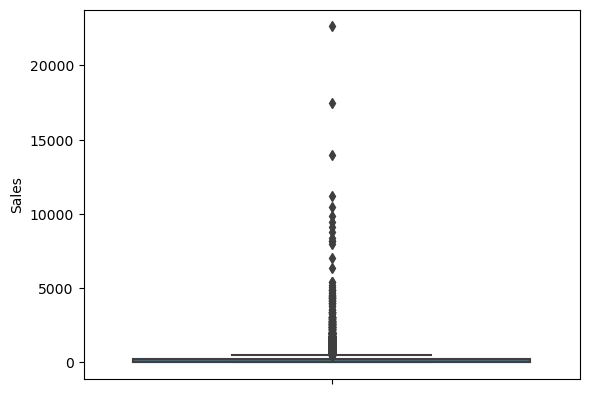

In [23]:
# Outliers in sales are ok but need to keep them in mind when applying scaling
sns.boxplot(y=df['Sales'])

<AxesSubplot:ylabel='Profit'>

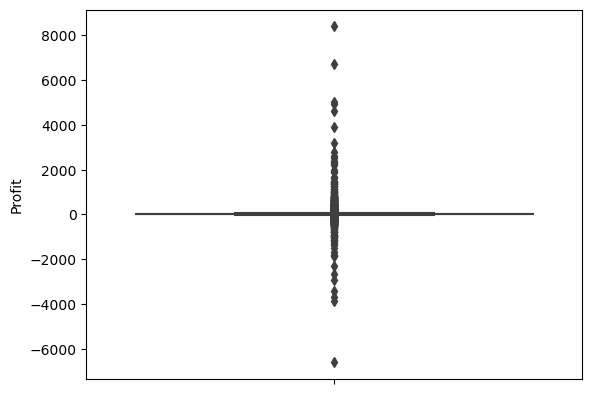

In [24]:
# Outliers in Profit are ok but need to keep them in mind when applying scaling
sns.boxplot(y=df['Profit'])

In [25]:
# from the boxplot we can see some rows with more than -1000
df[df['Profit'] < -1000]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
1199,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
1803,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Office Supplies,Supplies,4663.736,7,0.2,-1049.3406
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
2846,Standard Class,Home Office,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,762.594,3,0.8,-1143.8910
2928,Standard Class,Home Office,United States,Burlington,North Carolina,27217,South,Office Supplies,Binders,1633.188,4,0.7,-1306.5504
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
3151,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912


<AxesSubplot:ylabel='Discount'>

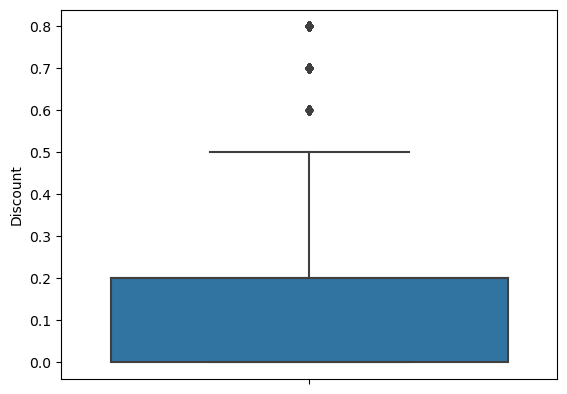

In [27]:
# Outliers should be ignored in discount since they are ranging between 0(0%)-1(100%)
sns.boxplot(y=df['Discount'])

<AxesSubplot:ylabel='Quantity'>

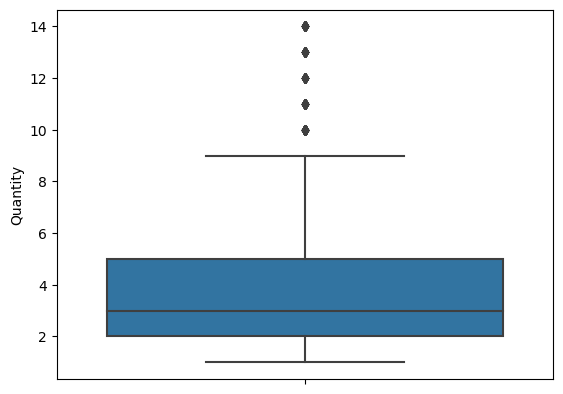

In [28]:
# Outliers in Quantity are ok but need to keep them in mind when applying scaling
sns.boxplot(y=df['Quantity'])

----------------------------------------------------------------------------------

# Exploring Data Visually to build a clear picture:

<function list.remove(value, /)>

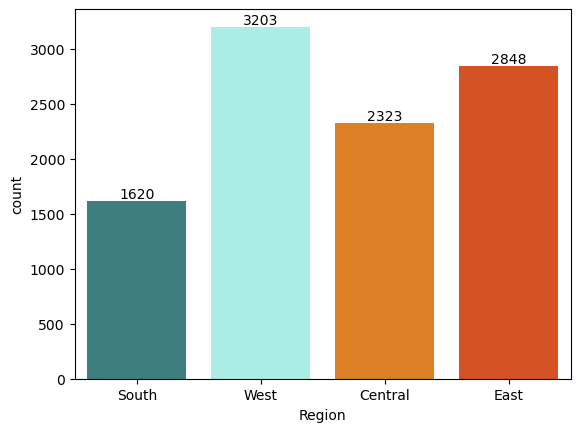

In [29]:
regionCount_plot = sns.countplot(x=df['Region'], palette=['#348888', '#9EF8EE', '#FA7F08', '#F24405'])
bar_label(regionCount_plot)

<function list.remove(value, /)>

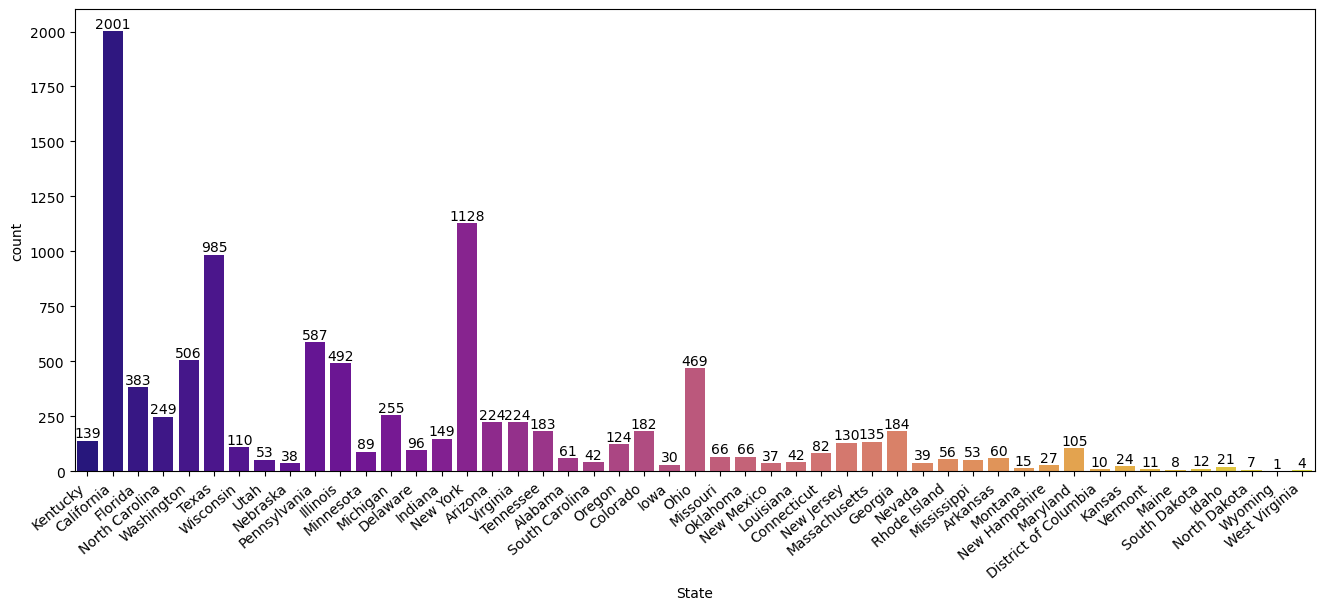

In [30]:
plt.figure(figsize=(16,6))
StateCount_plot = sns.countplot(x=df['State'], palette='plasma')
StateCount_plot.set_xticklabels(StateCount_plot.get_xticklabels(), rotation=40, ha='right')
bar_label(StateCount_plot)

<function list.remove(value, /)>

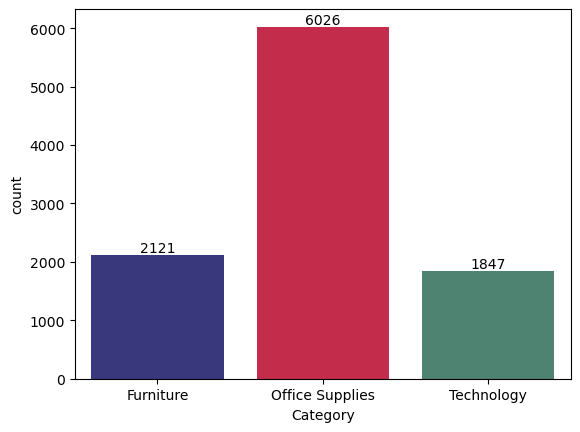

In [31]:
# plot how how much each catagory represent of the total data
caragoryCount_plot = sns.countplot(x=df['Category'], palette=['#2E2D88', '#DC143C', '#458B74'])
bar_label(caragoryCount_plot)

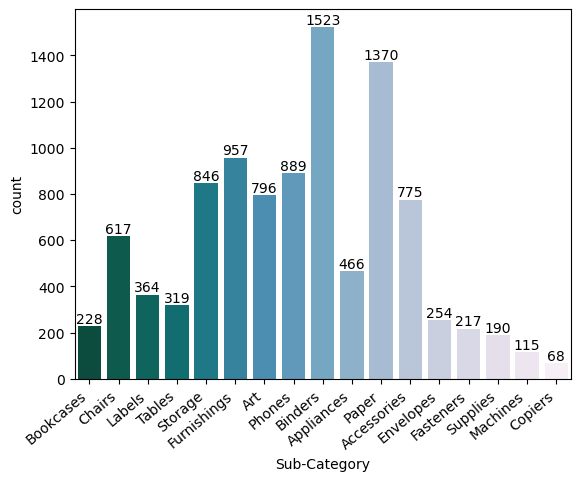

In [32]:
plot = sns.countplot(x=df['Sub-Category'], palette='PuBuGn_r')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
for contrainer in plot.containers:
    plot.bar_label(contrainer)

In [33]:
# all types of discounts:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

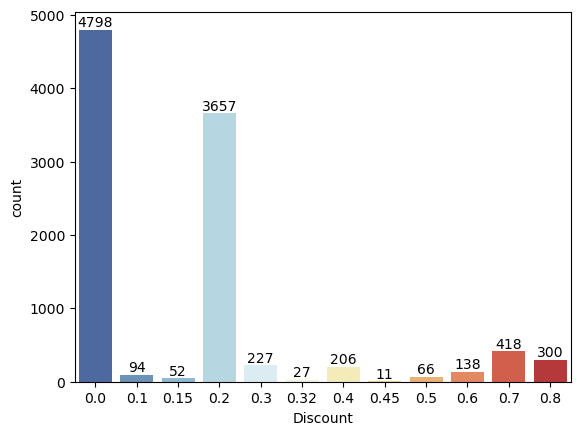

In [34]:
discount_counts = sns.countplot(x=df['Discount'], palette='RdYlBu_r')
for container in discount_counts.containers:
    discount_counts.bar_label(container)

In [35]:
df['Segment'].unique()  

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [36]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

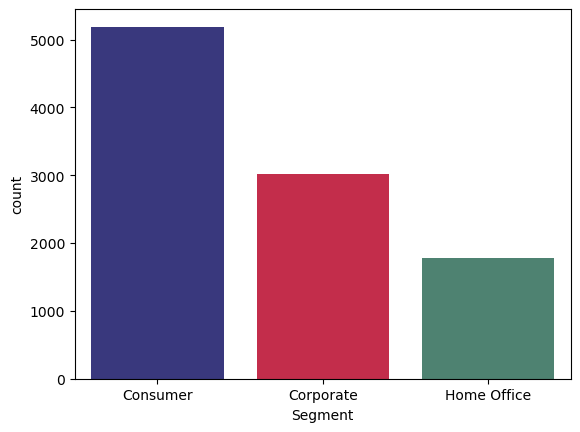

In [37]:
sns.countplot(x=df['Segment'], palette=['#2E2D88', '#DC143C', '#458B74'])

In [38]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [39]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

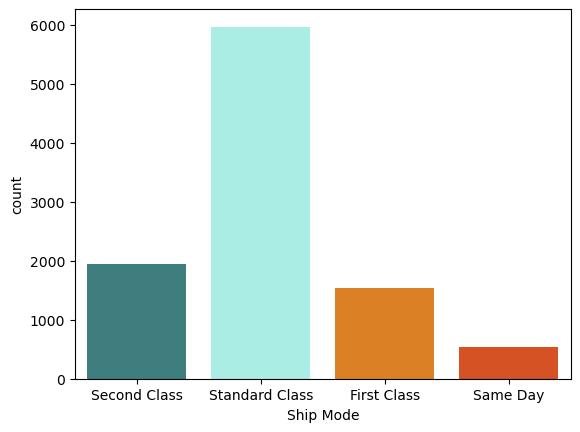

In [40]:
sns.countplot(x=df['Ship Mode'], palette=['#348888', '#9EF8EE', '#FA7F08', '#F24405'])

In [41]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

(5.0, 1000.0)

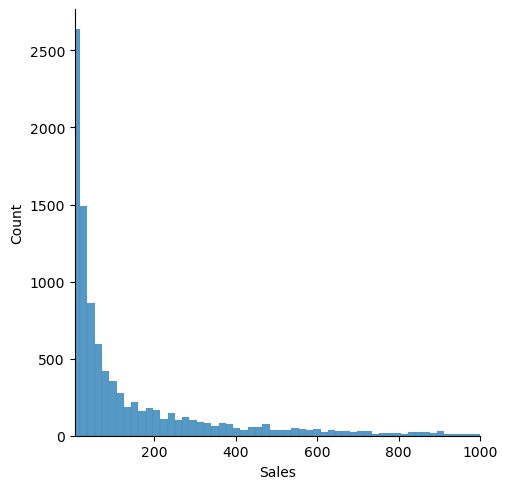

In [42]:
sns.displot(df['Sales'])
plt.xlim(5, 1000)

In [43]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

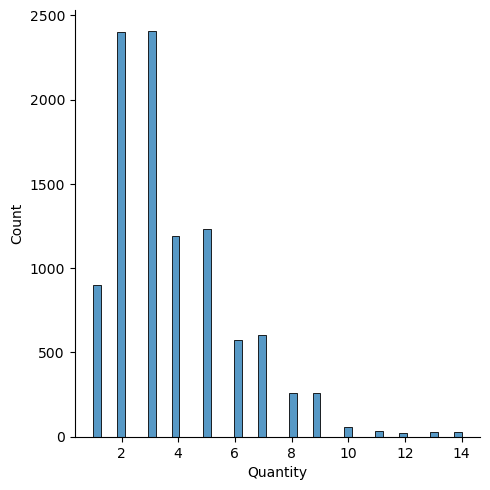

In [44]:
sns.displot(df['Quantity'])

---------------------------------------------------------------------------------------------------------

# Data Analysis
### (**with** Discounted Sales)

## 1- Correlations between Profit and other features (✅)

In [45]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


##### Result: 
###### we can see that **Sales**, **Discount** and **Quantity** has the most impact on Profit

###### Sales: with Positive relationship to the Profit
###### Discount: with a negative relationship to the profit (which make sense)
###### Quantity: which also has a positive relationship to profit

###### (***However*** Quantity is not a good measure of profit, while Sales and Discount has a direct impact of profit
###### so we will focuse of both of them and see their relation to the rest of the features).


## 2- Total Earnings Total Losses (✅)

In [46]:
df['Profit_Status_Discounted'] = df['Profit'].apply(lambda x: 'Earnings' if x > 0 else 'Losses')

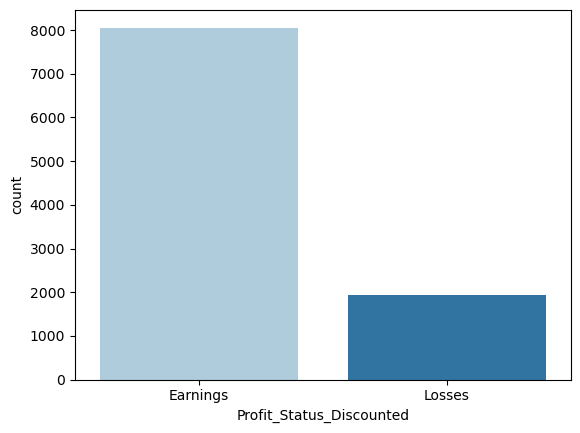

In [47]:
#Number of rows for Earnings and Losses rows with discounted Sales
ax_discounted = sns.countplot(x=df['Profit_Status_Discounted'],  palette="Paired")
# for container in ax_discounted.containers:
#     ax_discounted.bar_label(container)

##### Result: 
###### we can see that Earnings entries represent 8058/9994 (80.62%) of the total dataset
###### while Loss entries represent 1963/9994 (%19.64) of the total dataset
###### but still theses number don't give us the overall picture of the total Earnings and total Losses

In [48]:
# Earnings and losses profit while profit is discounted
total_EarningsLossesProfit_withDiscount = df[['Profit_Status_Discounted', 'Profit']].groupby(['Profit_Status_Discounted'], as_index=False).sum()
total_EarningsLossesProfit_withDiscount

,Profit_Status_Discounted,Profit
0,Earnings,442528.3074
1,Losses,-156131.2857


<function list.remove(value, /)>

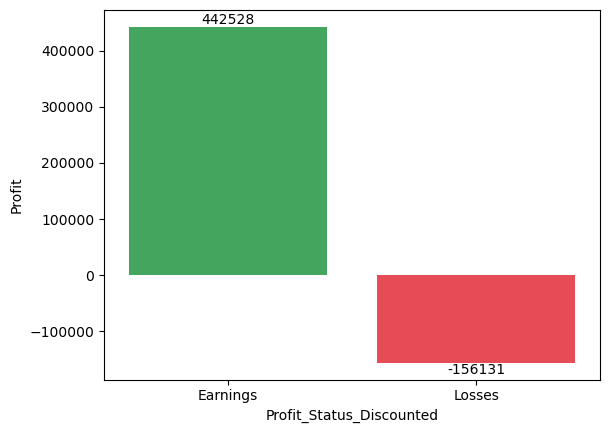

In [49]:
totalEarningsAndLosses = sns.barplot(x=total_EarningsLossesProfit_withDiscount['Profit_Status_Discounted'], y=total_EarningsLossesProfit_withDiscount['Profit'], palette=['#33b557', '#FF333F'])
bar_label(totalEarningsAndLosses)

##### Result: 
###### we can see that **Earnings** are "442,528" and **Losses** are "-156,131" which left us with **Profit** of "286,397" 
###### now we will need to minimize Losses in order to maximize our Profit
###### (the feature that has a direct impact on the profit is **Discount**, so we will dig deeper into analysing it)

## 3- Average Sales for Earnings and Losses (✅)

In [50]:
Earnings_Sales = df[df['Profit'] > 0]['Sales'].mean()
Earnings_Sales

223.4806227972162

In [51]:
Losses_Sales = df[df['Profit'] < 0]['Sales'].mean()
Losses_Sales

250.51157391769087

## 4- Average Quantity for Earnings and Losses (✅)

In [52]:
Earnings_Quantity = df[df['Profit'] > 0]['Quantity'].mean()
Earnings_Quantity

3.7947381484239266

In [53]:
Losses_Quantity = df[df['Profit'] < 0]['Quantity'].mean()
Losses_Quantity

3.7626937466595405

## 5- Types of Discounts and Their Distrbution (✅)

In [54]:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

<AxesSubplot:xlabel='Discount', ylabel='Count'>

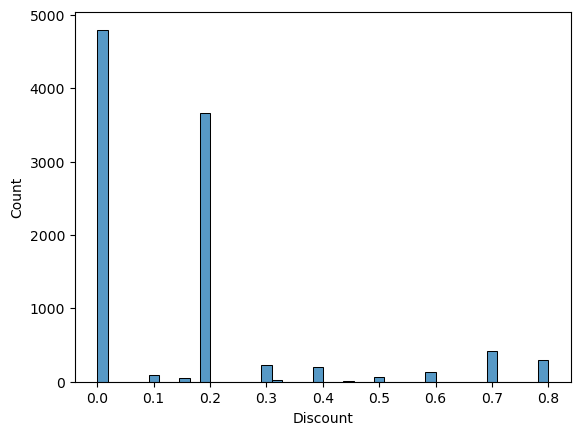

In [55]:
sns.histplot(x=df['Discount'])

## A6- The Relationship between Discount and Earnings and Losses Visually (✅)

<AxesSubplot:xlabel='Discount', ylabel='Count'>

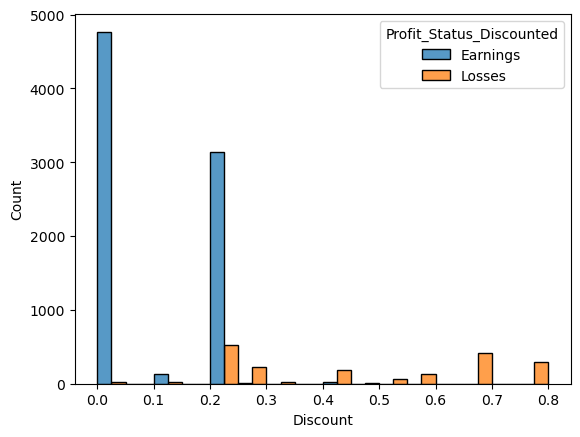

In [56]:
sns.histplot(data=df, x=df['Discount'], hue='Profit_Status_Discounted',bins=16, multiple='dodge')

##### Result:
###### here we can see that **Discount > 30%** will make more Losses than Eranings
###### (The following percedure will analysis **Discount** with respect to **Categories**, **Sub-Categories** and **Postal Code**)

## A7- Category Discounts quantity for each type of percentage (✅)

In [57]:

Discount_category2 = df.groupby(['Discount', 'Category']).size().reset_index().pivot(columns='Category', index='Discount', values=0).fillna(0)
Discount_category2.style.background_gradient(axis=1)

Category,Furniture,Office Supplies,Technology
Discount,,,
0.000000,836.000000,3129.000000,833.000000
0.100000,76.000000,16.000000,2.000000
0.150000,52.000000,0.000000,0.000000
0.200000,615.000000,2201.000000,841.000000
0.300000,222.000000,0.000000,5.000000
0.320000,27.000000,0.000000,0.000000
0.400000,75.000000,0.000000,131.000000
0.450000,11.000000,0.000000,0.000000
0.500000,54.000000,0.000000,12.000000


<AxesSubplot:xlabel='Discount'>

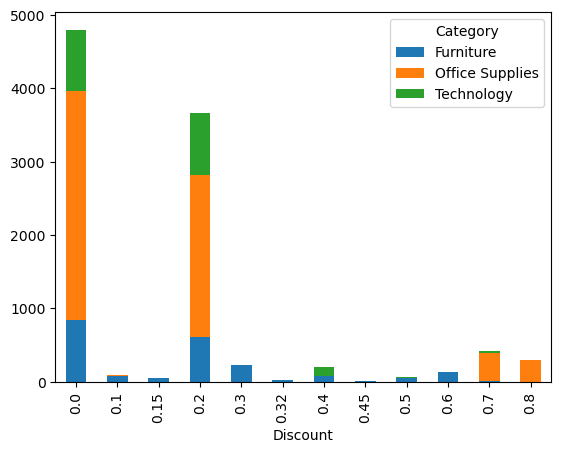

In [58]:

DiscountToCatagoryDf = df.groupby(['Discount', 'Category']).size().reset_index().pivot_table(columns='Category', index='Discount', values=0).fillna(0)
# Discount_category.plot(kind='bar', stacked=True)
DiscountToCatagoryDf.plot(kind='bar', stacked=True)

##### Result:
##### we can see that Furniture & Office Supplies are more likly to give Discounts than Technology Category
##### and we can see that **Office Supplies** gives more higher Discounts (70% and 80%), than other Categories

## A8- Each Categories Earnings and Losses (✅)


In [59]:

Category_EraningsLosses = df[['Category', 'Profit_Status_Discounted', 'Profit']].groupby(['Category', 'Profit_Status_Discounted'])['Profit'].sum().abs().to_frame()
Category_EraningsLosses

Profit
Category        Profit_Status_Discounted             
Furniture       Earnings                   79387.3818
                Losses                     60936.1090
Office Supplies Earnings                  179106.0593
                Losses                     56615.2585
Technology      Earnings                  184034.8663
                Losses                     38579.9182

## A9- Sub-Categories Discounts quantity for each type of percentage (✅)


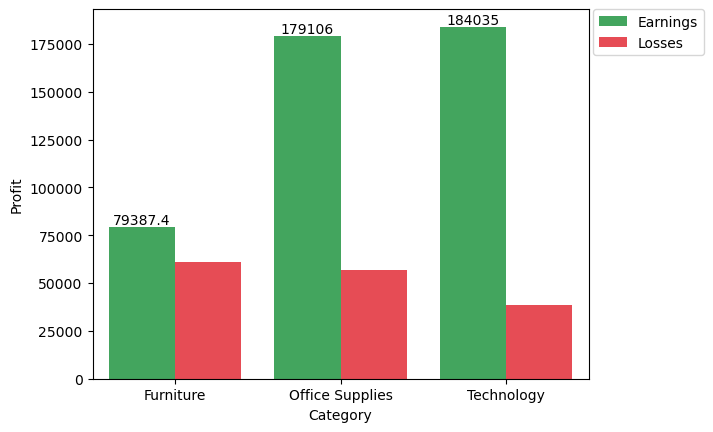

In [60]:

catagoryProfit_plot = sns.barplot(data= Category_EraningsLosses.reset_index(), x='Category', y='Profit', hue='Profit_Status_Discounted', palette=['#33b557', '#FF333F'])
bar_label(catagoryProfit_plot)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [61]:
# analysing Discount given by each SubCategories
Discount_subcategory = df.groupby(['Discount', 'Sub-Category']).size().reset_index().pivot(columns='Sub-Category', index='Discount', values=0).fillna(0)
Discount_subcategory.style.background_gradient(axis=1)

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Discount,,,,,,,,,,,,,,,,,
0.000000,471.000000,271.000000,498.000000,337.000000,60.000000,133.000000,22.000000,152.000000,128.000000,571.000000,239.000000,29.000000,857.000000,311.000000,530.000000,117.000000,72.000000
0.100000,0.000000,16.000000,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.150000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.200000,304.000000,112.000000,298.000000,573.000000,46.000000,250.000000,37.000000,102.000000,89.000000,248.000000,125.000000,31.000000,513.000000,469.000000,316.000000,73.000000,71.000000
0.300000,0.000000,0.000000,0.000000,0.000000,10.000000,158.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,54.000000
0.320000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,109.000000,0.000000,0.000000,75.000000
0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
0.500000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,36.000000


## A10- Each Sub-Categories Earnings and Losses (✅)

In [62]:
subCatagory_EarningsLosses = df[['Sub-Category', 'Profit_Status_Discounted', 'Profit']].groupby(['Sub-Category', 'Profit_Status_Discounted'])['Profit'].sum().abs().to_frame()
subCatagory_EarningsLosses

Profit
Sub-Category Profit_Status_Discounted            
Accessories  Earnings                  42867.2622
             Losses                      930.6265
Appliances   Earnings                  26767.6466
             Losses                     8629.6412
Art          Earnings                   6527.7870
Binders      Earnings                  68732.2597
             Losses                    38510.4964
Bookcases    Earnings                   8679.6500
             Losses                    12152.2060
Chairs       Earnings                  36471.0076
             Losses                     9880.8413
Copiers      Earnings                  55617.8249
Envelopes    Earnings                   6964.1767
Fasteners    Earnings                    982.7134
             Losses                       33.1952
Furnishings  Earnings                  19550.0570
             Losses                     6490.9134
Labels       Earnings                   5546.2540
Machines     Earnings                  33503.4251
             Losses                    30118.6682
Paper        Earnings                  34053.5693
Phones       Earnings                  52046.3541
             Losses                     7530.6235
Storage      Earnings                  27705.1302
             Losses                     6426.3038
Supplies     Earnings                   1826.5224
             Losses                     3015.6219
Tables       Earnings                  14686.6672
             Losses                    32412.1483

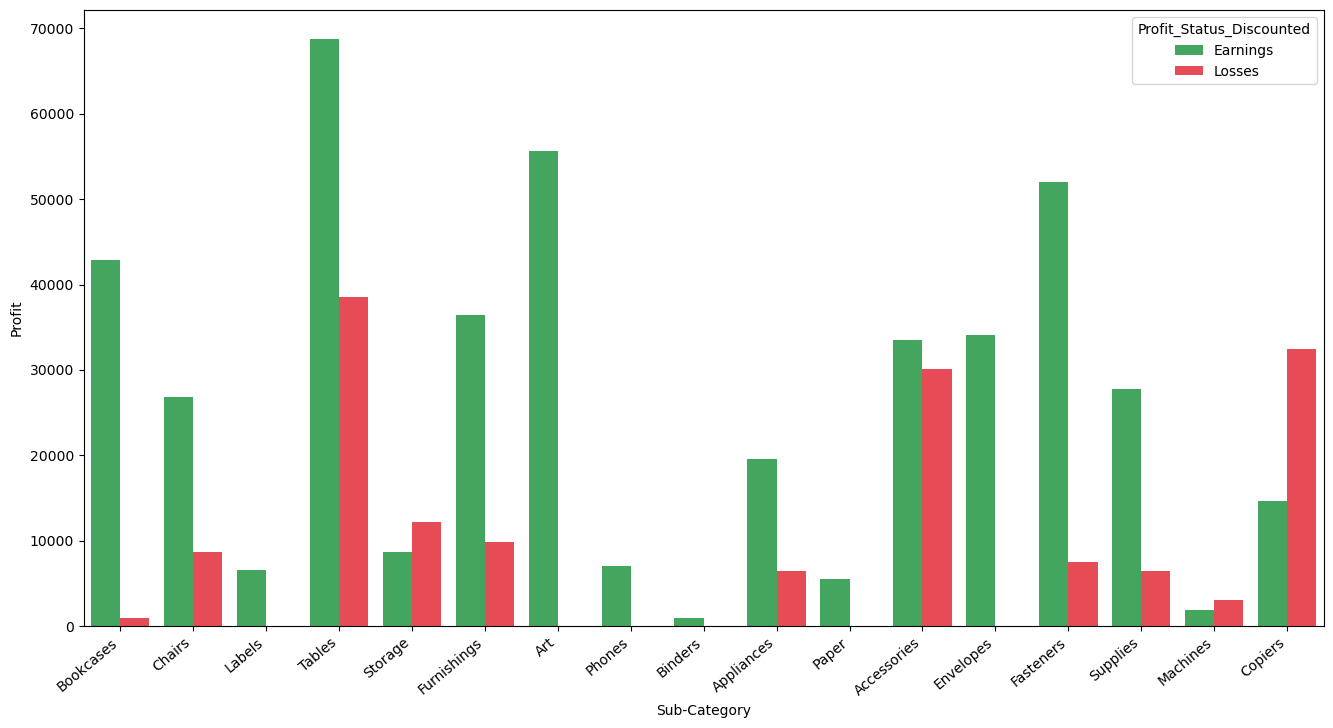

In [63]:
plt.figure(figsize=(16,8))
subCatagory_EarningsLosses_plot = sns.barplot(data=  subCatagory_EarningsLosses.reset_index(), x='Sub-Category', y='Profit', hue='Profit_Status_Discounted', palette= ['#33b557', '#FF333F']).set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right") 

##### Result:
###### **Labels, Art, Paper, Envelopes** are the Sub-Categories with 0 Losses
###### **Bookcase, Phones, Binders** are the Sub-Categories with a really small losses
###### **Storage, Machines, Copiers** are sub-Categories with Losses more than Earnings
###### The rest of the sub-categories have moderate to high Losses 

## A11- Top 20 Best Branches Earning and Losses (✅)

In [64]:
PostalCode_PositiveProfit = df[['Postal Code', 'Profit']].query('Profit > 0').groupby(['Postal Code'])['Profit'].sum().to_frame()
PostalCode_PositiveProfit

,Profit
Postal Code,
1040,60.3920
1453,79.5016
1752,67.6068
1810,124.1886
1841,1940.9117
...,...
98502,139.6269
98632,38.8983
98661,75.4546


In [65]:
best20PostalCodeEarnings = PostalCode_PositiveProfit.nlargest(n=20, columns='Profit').sort_values(by='Profit', ascending=False)
best20PostalCodeEarnings

,Profit
Postal Code,
10024,23736.5040
10035,16877.7281
10009,14041.4131
98115,13360.8079
10011,11347.3611
47905,8976.0973
98105,8890.4154
94122,8456.3386
19711,8086.1715


<AxesSubplot:xlabel='Postal Code', ylabel='Profit'>

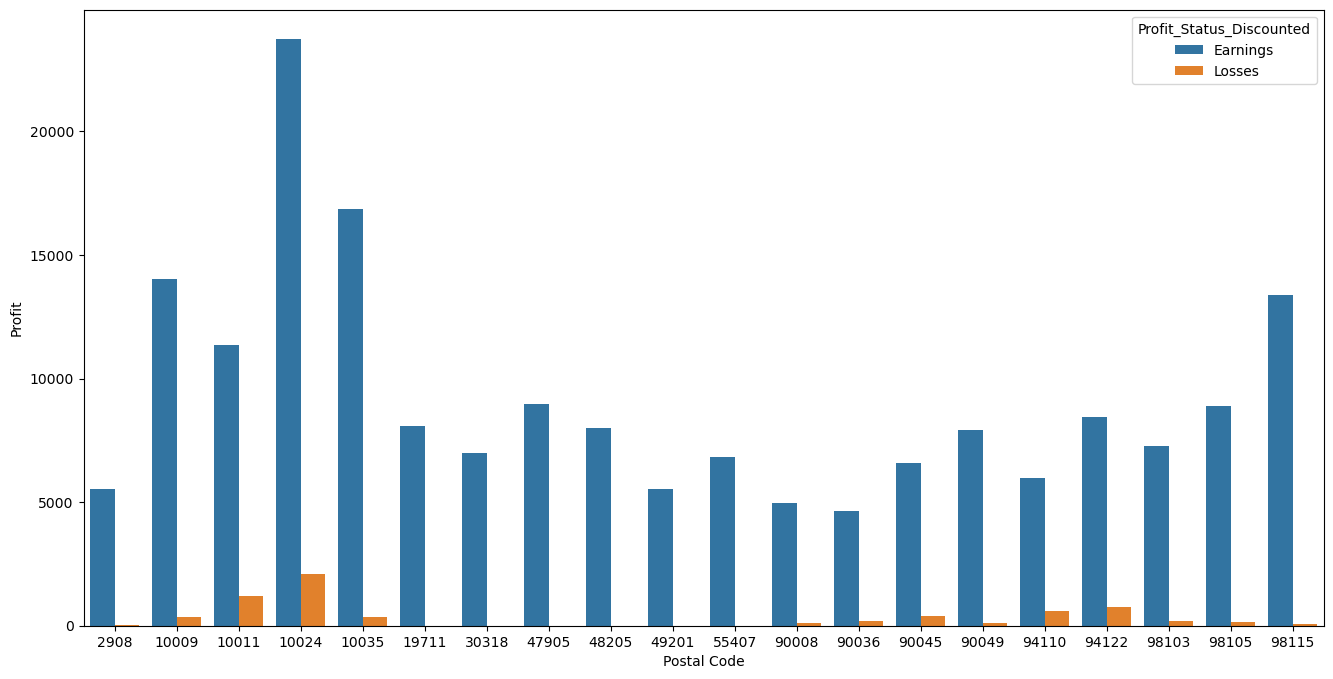

In [66]:
plt.figure(figsize=(16, 8))
best20Branches = best20PostalCodeEarnings.reset_index()['Postal Code'].values
best20Branches_EarningsGrouped = df[df['Postal Code'].isin(best20Branches)][['Postal Code','Profit_Status_Discounted', 'Profit']].groupby(['Postal Code', 'Profit_Status_Discounted'])['Profit'].sum().abs().to_frame()
best20Branches_EarningsGrouped
sns.barplot(data = best20Branches_EarningsGrouped.reset_index(), x='Postal Code', y='Profit', hue='Profit_Status_Discounted')


## A12- Top 20 Best Branches Discount Distribution (✅)

<AxesSubplot:xlabel='Discount', ylabel='Count'>

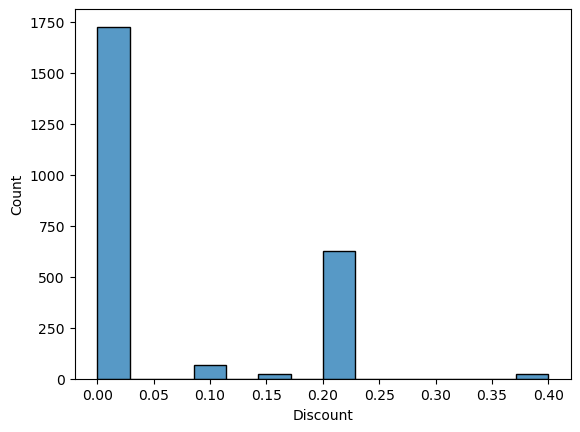

In [67]:
sns.histplot(df[df['Postal Code'].isin(best20Branches)]['Discount'])

##### Result:
###### We can see that there are not a lot of discounts given, and no discounts > %40 were given

## A13- Top 20 Best Branches Total Losses due to discount (✅)

In [68]:
best20Branches_totalMoneyLossByDiscounts = (df[df['Postal Code'].isin(best20Branches)]['Sales'] * df[df['Postal Code'].isin(best20Branches)]['Discount']).sum()
print(f'${best20Branches_totalMoneyLossByDiscounts}')

$56317.156225


## A12- Top 10 worest Branches Earnings and Losses

In [69]:
PostalCode_NegativeProfit = df[['Postal Code', 'Profit']].query('Profit < 0').groupby(['Postal Code'])['Profit'].sum().to_frame()
PostalCode_NegativeProfit

,Profit
Postal Code,
1841,-91.5082
2038,-474.7535
2908,-28.2240
2920,-201.9438
3820,-105.3164
...,...
97756,-235.7724
98103,-172.4273
98105,-155.8112


In [70]:
worest20PostalCodeLosses = PostalCode_NegativeProfit.nsmallest(n=20, columns='Profit').sort_values(by='Profit', ascending=False).sort_values(by='Profit', ascending=True)
worest20PostalCodeLosses

,Profit
Postal Code,
78207,-7831.0254
43130,-7378.6382
60653,-6648.5187
19134,-6071.8358
27217,-5999.3318
19140,-5767.5748
77095,-5502.9340
19143,-4613.1388
77041,-3700.8376


## A14- Top 20 Best Branches Sub-Categories Earnings and Losses (✅)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

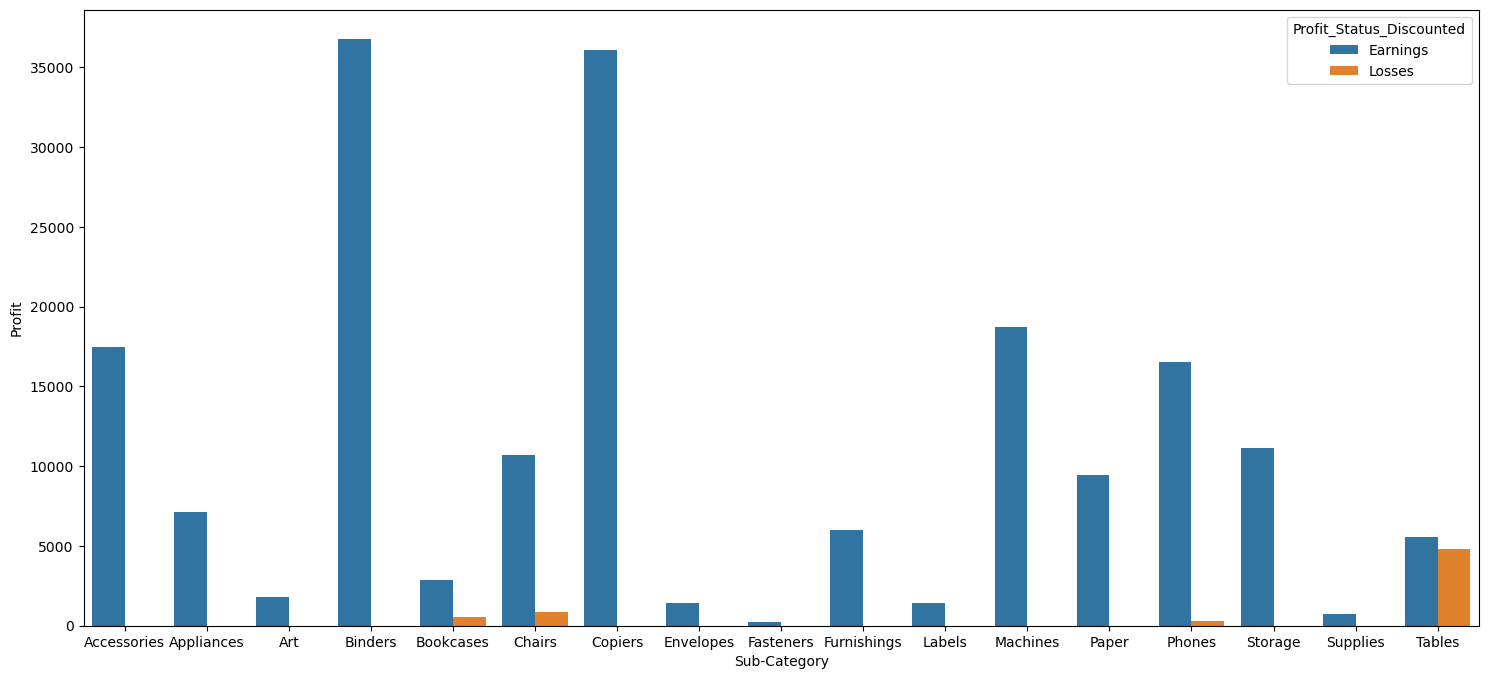

In [71]:
plt.figure(figsize=(18,8))
best20BeanchesSubCategories_EarningsAndLosses = df[df['Postal Code'].isin(best20Branches)].groupby(['Sub-Category', 'Profit_Status_Discounted'])['Profit'].sum().abs()
sns.barplot(data = best20BeanchesSubCategories_EarningsAndLosses.reset_index(), x='Sub-Category', y='Profit', hue='Profit_Status_Discounted')

##### Result:
###### we can see that **BookCase, Chairs and Phones** Sub-Categories causes minor Losses while **Tables** Causes a big loss compared to its Earnings

## A15- Top 20 Worest Branches Earning and Losses (✅)

<AxesSubplot:xlabel='Postal Code', ylabel='Profit'>

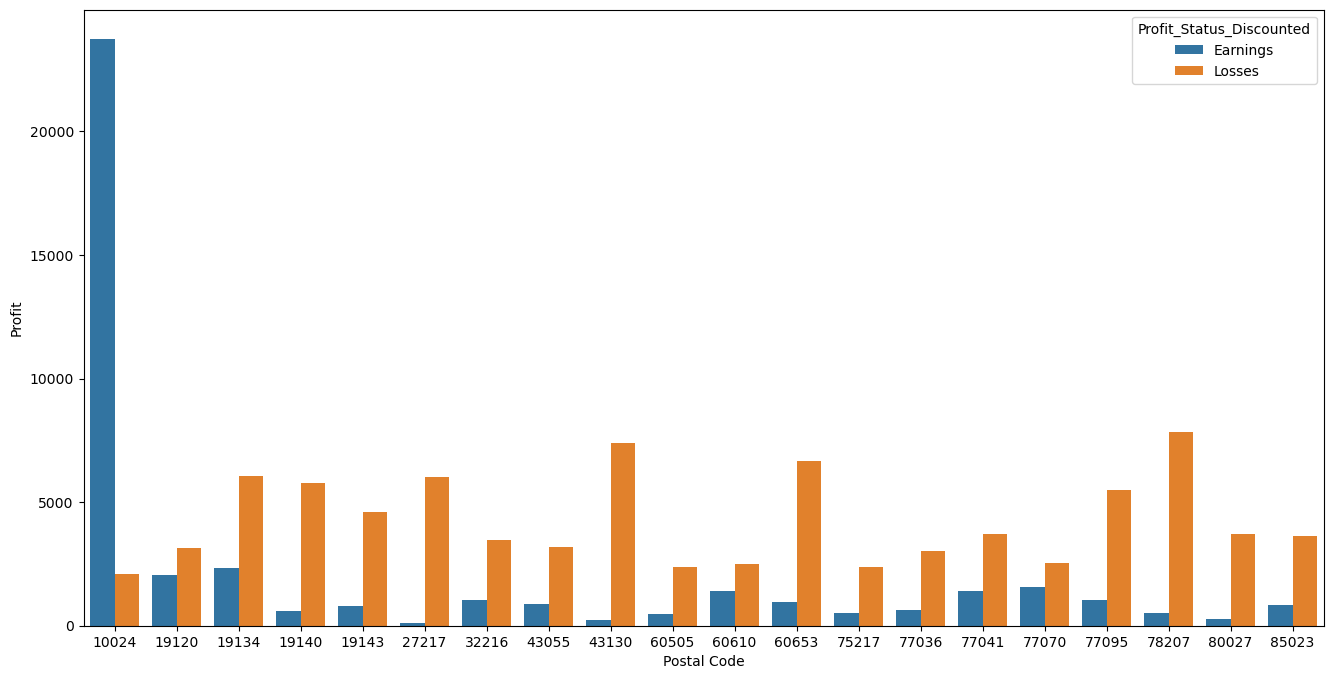

In [72]:
plt.figure(figsize=(16, 8))
worest20Branches = worest20PostalCodeLosses.reset_index()['Postal Code'].values
worest20Branches_LossesGrouped = df[df['Postal Code'].isin(worest20Branches)][['Postal Code','Profit_Status_Discounted', 'Profit']].groupby(['Postal Code', 'Profit_Status_Discounted'])['Profit'].sum().abs().to_frame()
worest20Branches_LossesGrouped
sns.barplot(data = worest20Branches_LossesGrouped.reset_index(), x='Postal Code', y='Profit', hue='Profit_Status_Discounted')

## A16- Top 20 Worest Branches Discount Distribution (✅)

<AxesSubplot:xlabel='Discount', ylabel='Count'>

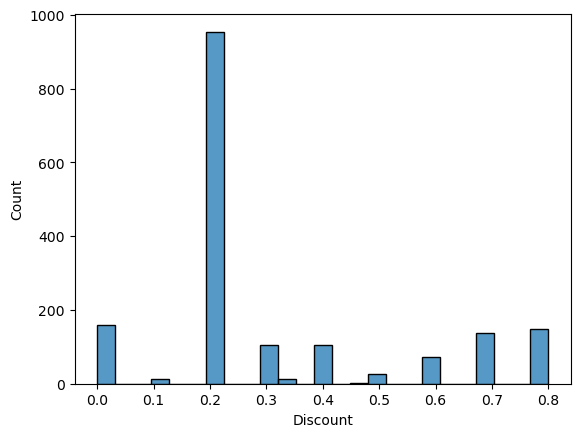

In [73]:
sns.histplot(x=df[df['Postal Code'].isin(worest20Branches)]['Discount'])

## A17- Top 20 worest Branches Total Losses due to discount (✅)

In [74]:
worest20Branches_totalMoneyLossByDiscounts = (df[df['Postal Code'].isin(worest20Branches)]['Sales'] * df[df['Postal Code'].isin(worest20Branches)]['Discount']).sum()
print(f'${worest20Branches_totalMoneyLossByDiscounts}')

$123405.90045800002


## A18- Top 20 Worest Branches Sub-Categories Earnings and Losses (✅)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

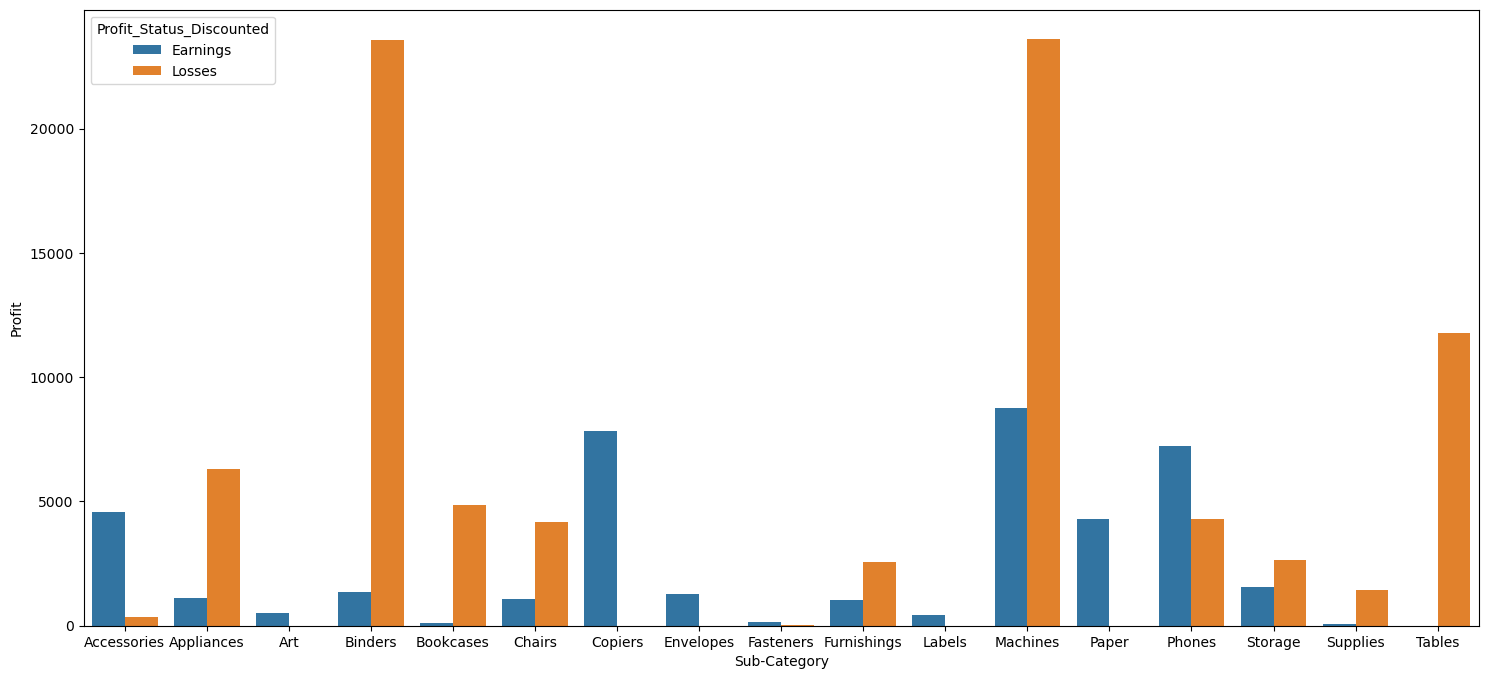

In [75]:
plt.figure(figsize=(18,8))
worest20BeanchesSubCategories_EarningsAndLosses = df[df['Postal Code'].isin(worest20Branches)].groupby(['Sub-Category', 'Profit_Status_Discounted'])['Profit'].sum().abs()
sns.barplot(data = worest20BeanchesSubCategories_EarningsAndLosses.reset_index(), x='Sub-Category', y='Profit', hue='Profit_Status_Discounted')

--------------------------------------------------------------------------------

# Data Analysis
### (**without** Discounted Sales)

In [76]:
def profit_without_discount(row):
    sales = row[0]
    discount = row[1]
    profit = row[2] 
    profitWithoutDiscount = profit + (sales * discount)
    return profitWithoutDiscount
    
df['Profit_Without_Discount'] = df[['Sales', 'Discount', 'Profit']].apply(profit_without_discount, axis=1)

In [77]:
df['Profit_Status_Without_Discount'] = df['Profit_Without_Discount'].apply(lambda x: 'Earnings' if x > 0 else 'Losses')

## B1- Total Eranings Total Losses (✅)

<function list.remove(value, /)>

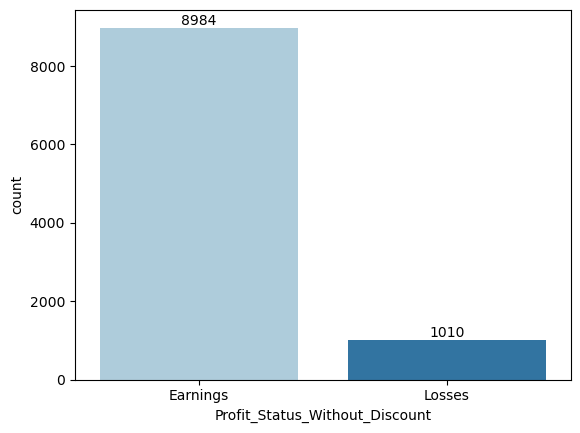

In [78]:
nRows_forEarningsAndLosses = sns.countplot(x=df['Profit_Status_Without_Discount'],  palette="Paired")
bar_label(nRows_forEarningsAndLosses)

##### Result: 
###### we can see that Earnings entries represent 8984/9994 (89.89%) of the total dataset
###### while Loss entries represent 1010/9994 (%10.60) of the total dataset
###### but still theses number don't give us the overall picture of the total Earnings and total Losses

In [79]:
total_EarningsLossesProfit = df[['Profit_Status_Without_Discount', 'Profit_Without_Discount']].groupby(['Profit_Status_Without_Discount'], as_index=False).sum()
total_EarningsLossesProfit

,Profit_Status_Without_Discount,Profit_Without_Discount
0,Earnings,644437.720917
1,Losses,-35458.564876


<function list.remove(value, /)>

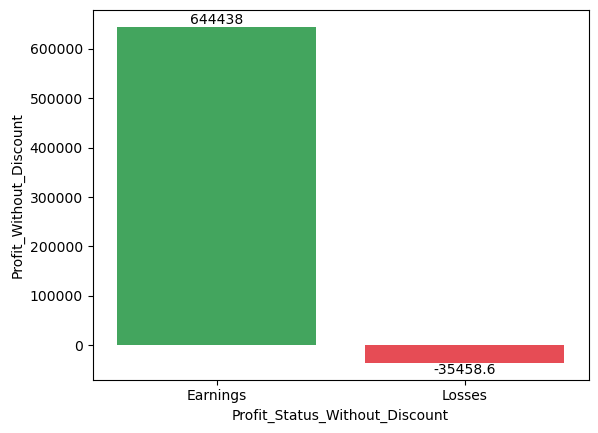

In [80]:
totalEarningsAndLosses = sns.barplot(x=total_EarningsLossesProfit['Profit_Status_Without_Discount'], y=total_EarningsLossesProfit['Profit_Without_Discount'], palette=['#33b557', '#FF333F'])
bar_label(totalEarningsAndLosses)

##### Result: 
###### we can see that **Earnings** are "644,438" and **Losses** are "-35,458" which left us with **Profit** of "608,980" 
###### now we will need to minimize Losses in order to maximize our Profit

## B2- Each Categories Earnings and Losses (✅)

In [81]:
Category_EraningsLosses = df[['Category', 'Profit_Status_Without_Discount', 'Profit_Without_Discount']].groupby(['Category', 'Profit_Status_Without_Discount'])['Profit_Without_Discount'].sum().abs().to_frame()
Category_EraningsLosses

Profit_Without_Discount
Category        Profit_Status_Without_Discount                         
Furniture       Earnings                                  149957.297317
                Losses                                      7989.483476
Office Supplies Earnings                                  217631.427100
                Losses                                     18735.685700
Technology      Earnings                                  276848.996500
                Losses                                      8733.395700

<AxesSubplot:xlabel='Category', ylabel='Profit_Without_Discount'>

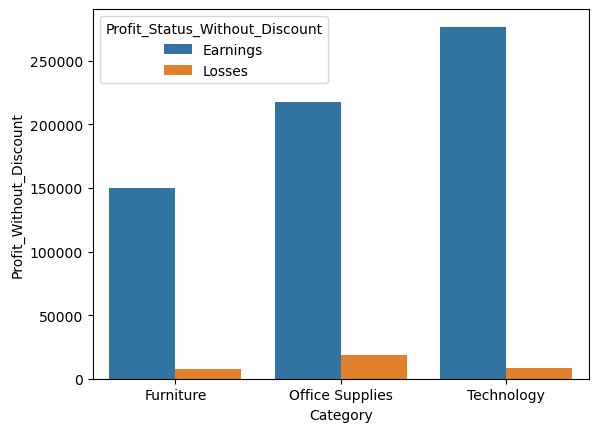

In [82]:
sns.barplot(data=Category_EraningsLosses.reset_index(), x='Category', y='Profit_Without_Discount', hue='Profit_Status_Without_Discount')

## B3- Each Sub-Categories Earnings and Losses (✅)

In [83]:
subCategory_EraningsLosses = df[['Sub-Category', 'Profit_Status_Without_Discount', 'Profit_Without_Discount']].groupby(['Sub-Category', 'Profit_Status_Without_Discount'])['Profit_Without_Discount'].sum().abs().to_frame()
subCategory_EraningsLosses

Profit_Without_Discount
Sub-Category Profit_Status_Without_Discount                         
Accessories  Earnings                                   51738.637300
Appliances   Earnings                                   31551.919100
             Losses                                      5923.614000
Art          Earnings                                    8348.617400
Binders      Earnings                                   86083.531000
             Losses                                     12116.688400
Bookcases    Earnings                                   20145.888117
             Losses                                      2817.853076
Chairs       Earnings                                   76464.197800
             Losses                                        59.231400
Copiers      Earnings                                   73617.555300
Envelopes    Earnings                                    8138.167100
Fasteners    Earnings                                    1193.522200
             Losses                                         3.716000
Furnishings  Earnings                                   23938.059400
             Losses                                      2169.963000
Labels       Earnings                                    6195.604400
Machines     Earnings                                   58812.201000
             Losses                                      8661.462600
Paper        Earnings                                   39117.836500
Phones       Earnings                                   92680.602900
             Losses                                        71.933100
Storage      Earnings                                   34958.804500
             Losses                                       482.008500
Supplies     Earnings                                    2043.424900
             Losses                                       209.658800
Tables       Earnings                                   29409.152000
             Losses                                      2942.436000

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit_Without_Discount'>

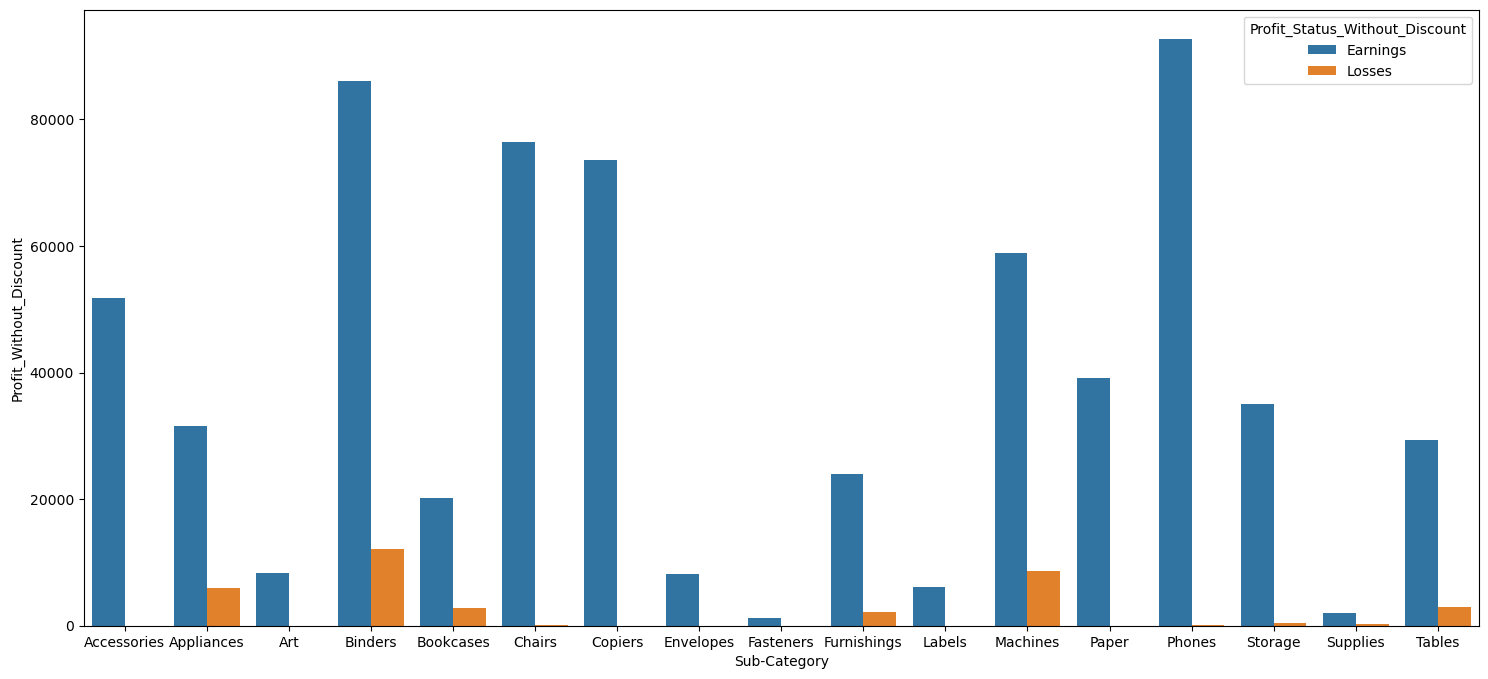

In [84]:
plt.figure(figsize=(18,8))
sns.barplot(data=subCategory_EraningsLosses.reset_index(), x='Sub-Category', y='Profit_Without_Discount', hue='Profit_Status_Without_Discount')

## B4- Top 20 Best Branches Earning and Losses (✅) 

In [85]:
PostalCode_PositiveProfit = df[['Postal Code', 'Profit_Without_Discount']].query('Profit_Without_Discount > 0').groupby(['Postal Code'])['Profit_Without_Discount'].sum().to_frame()
PostalCode_PositiveProfit

,Profit_Without_Discount
Postal Code,
1040,60.3920
1453,79.5016
1752,67.6068
1810,124.1886
1841,2065.6531
...,...
98502,300.7245
98632,38.8983
98661,135.9298


In [86]:
best20PostalCodeEarnings = PostalCode_PositiveProfit.nlargest(n=20, columns='Profit_Without_Discount').sort_values(by='Profit_Without_Discount', ascending=False)
best20PostalCodeEarnings

,Profit_Without_Discount
Postal Code,
10024,28896.314200
10035,22432.366000
10009,17469.985300
98115,14746.624500
94122,13474.652550
10011,13428.457400
32216,13166.867400
98105,12765.231800
90049,12724.966400


<AxesSubplot:xlabel='Postal Code', ylabel='Profit_Without_Discount'>

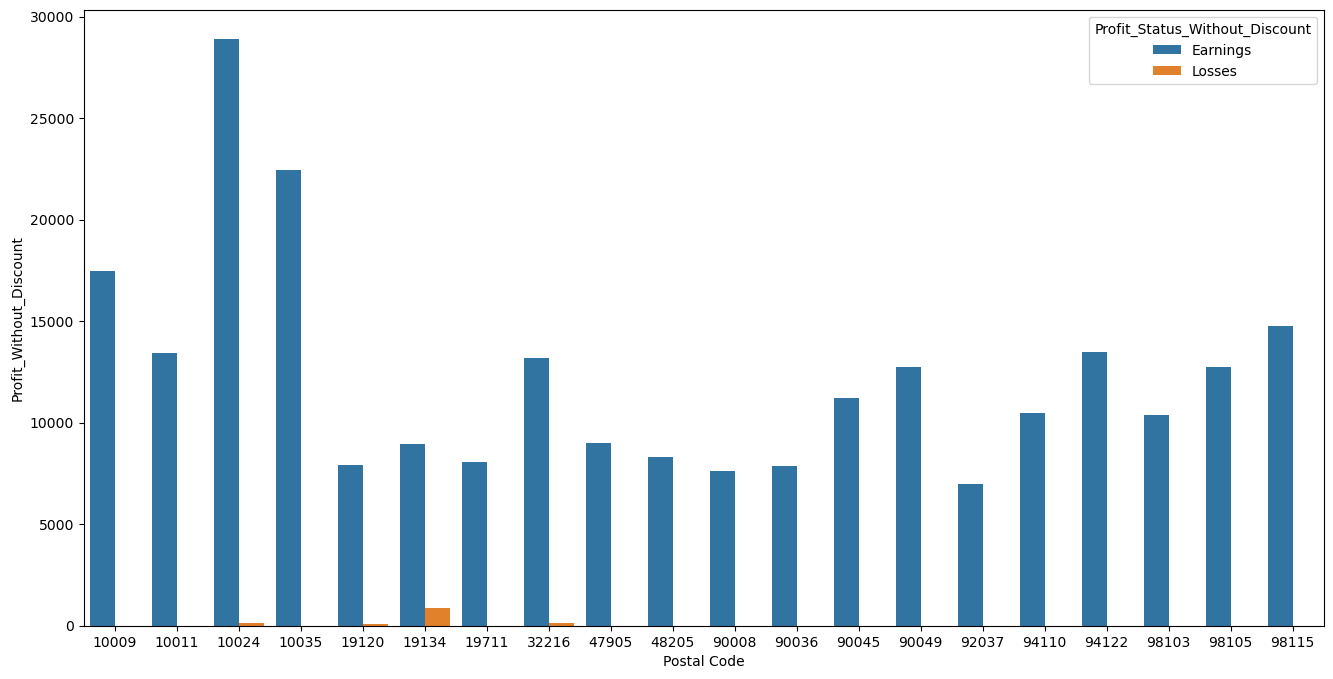

In [87]:
plt.figure(figsize=(16, 8))
best20BranchesWithoutDiscount = best20PostalCodeEarnings.reset_index()['Postal Code'].values
best20Branches_EarningsGroupedWithoutDiscount = df[df['Postal Code'].isin(best20BranchesWithoutDiscount)][['Postal Code','Profit_Status_Without_Discount', 'Profit_Without_Discount']].groupby(['Postal Code', 'Profit_Status_Without_Discount'])['Profit_Without_Discount'].sum().abs().to_frame()
best20Branches_EarningsGroupedWithoutDiscount
sns.barplot(data = best20Branches_EarningsGroupedWithoutDiscount.reset_index(), x='Postal Code', y='Profit_Without_Discount', hue='Profit_Status_Without_Discount')

## B5- Top 20 Best Branches Sub-Categories Earnings and Losses (✅)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit_Without_Discount'>

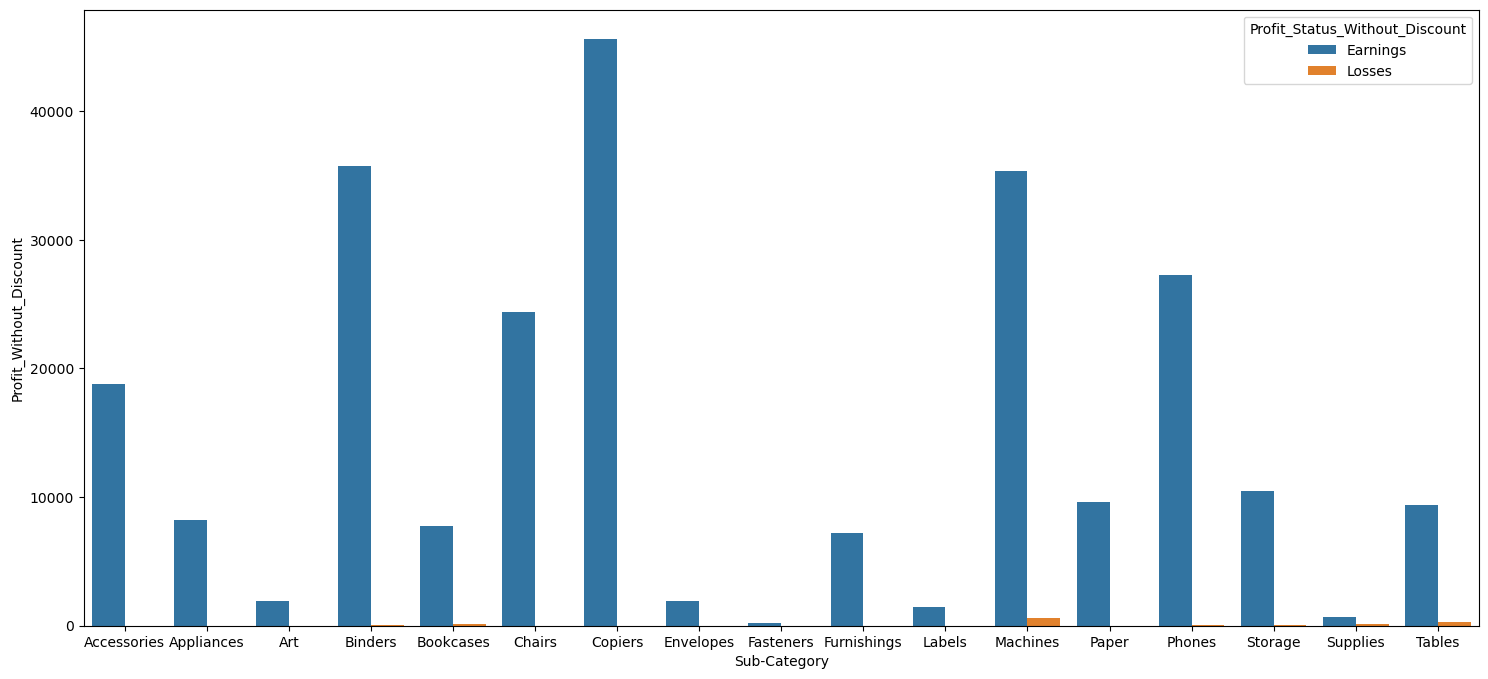

In [88]:
plt.figure(figsize=(18,8))
best20BeanchesSubCategories_EarningsAndLosses = df[df['Postal Code'].isin(best20BranchesWithoutDiscount)].groupby(['Sub-Category', 'Profit_Status_Without_Discount'])['Profit_Without_Discount'].sum().abs()
sns.barplot(data = best20BeanchesSubCategories_EarningsAndLosses.reset_index(), x='Sub-Category', y='Profit_Without_Discount', hue='Profit_Status_Without_Discount')

## B6- Top 20 Worest Branches Earning and Losses (✅)

<AxesSubplot:xlabel='Postal Code', ylabel='Profit_Without_Discount'>

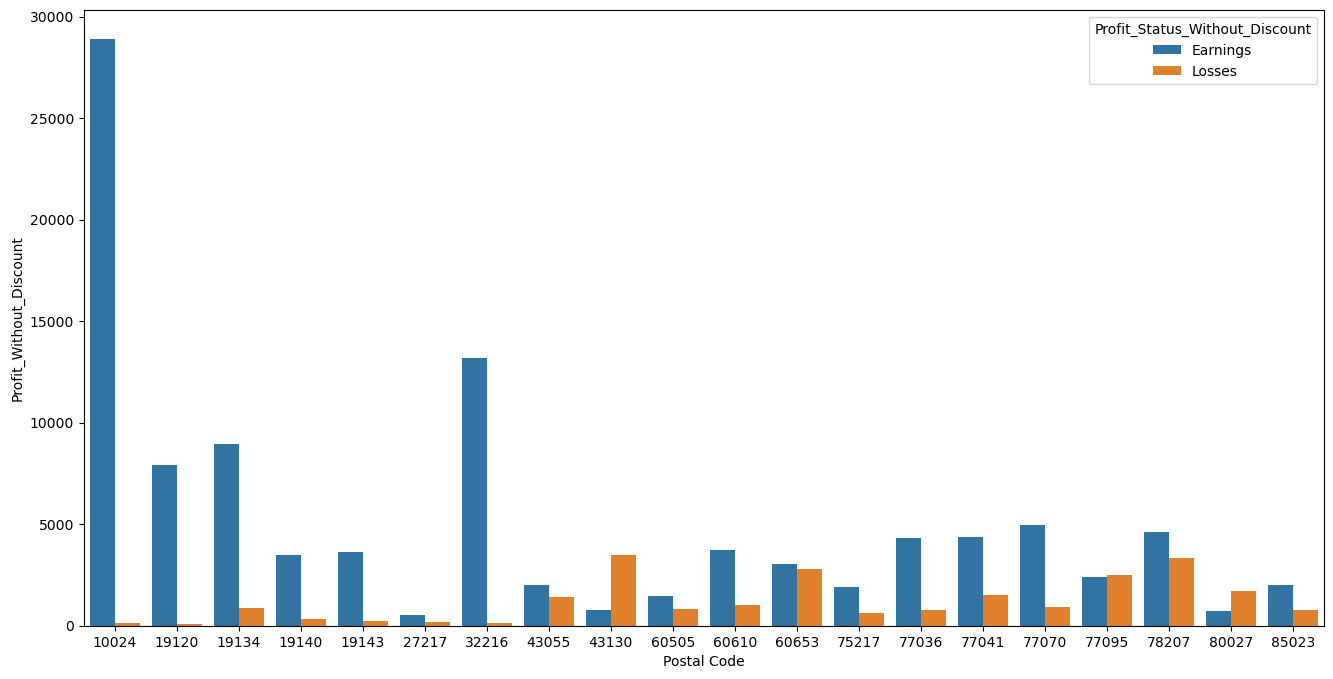

In [89]:
plt.figure(figsize=(16, 8))
worest20BranchesWithoutDiscount = worest20PostalCodeLosses.reset_index()['Postal Code'].values
worest20Branches_LossesGrouped = df[df['Postal Code'].isin(worest20BranchesWithoutDiscount)][['Postal Code','Profit_Status_Without_Discount', 'Profit_Without_Discount']].groupby(['Postal Code', 'Profit_Status_Without_Discount'])['Profit_Without_Discount'].sum().abs().to_frame()
worest20Branches_LossesGrouped
sns.barplot(data = worest20Branches_LossesGrouped.reset_index(), x='Postal Code', y='Profit_Without_Discount', hue='Profit_Status_Without_Discount')

## B7- Top 20 Worest Branches Sub-Categories Earnings and Losses (✅)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit_Without_Discount'>

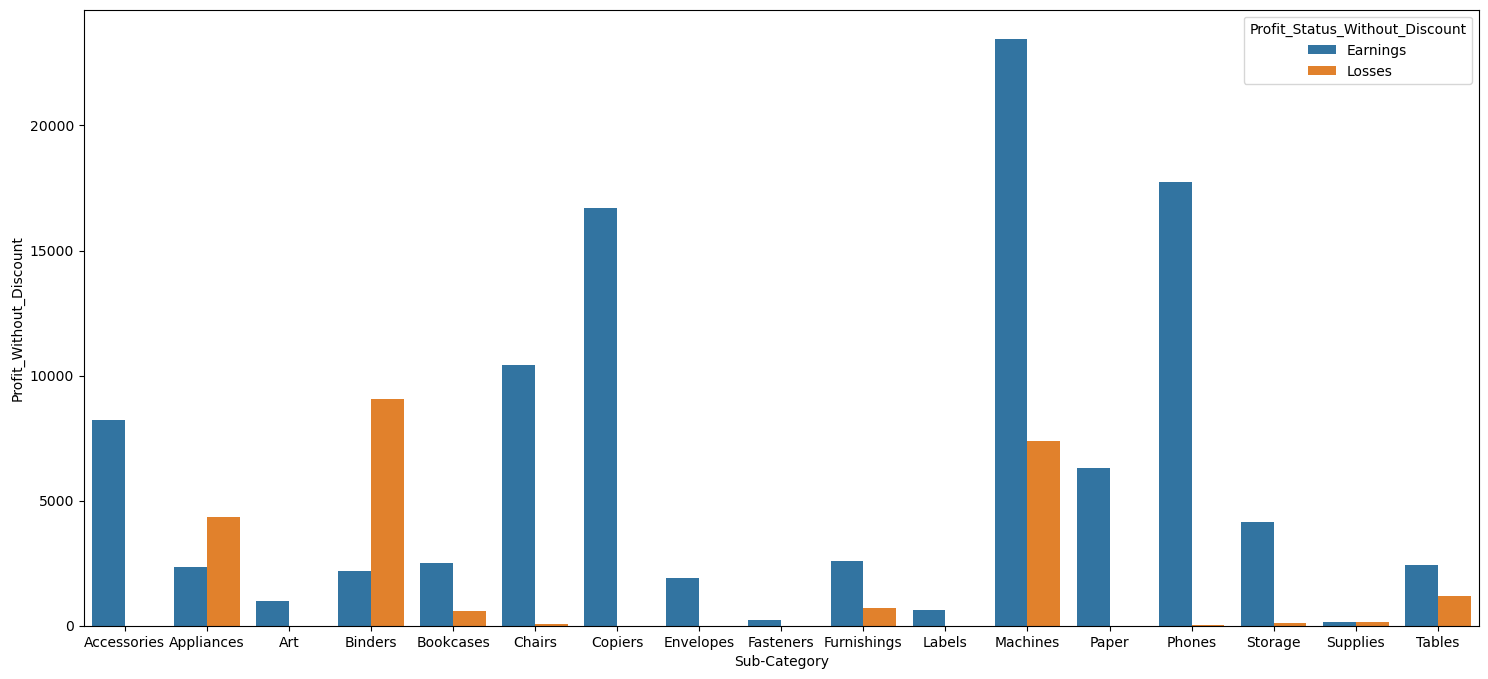

In [90]:
plt.figure(figsize=(18,8))
worest20BeanchesSubCategories_EarningsAndLosses = df[df['Postal Code'].isin(worest20BranchesWithoutDiscount)].groupby(['Sub-Category', 'Profit_Status_Without_Discount'])['Profit_Without_Discount'].sum().abs()
sns.barplot(data = worest20BeanchesSubCategories_EarningsAndLosses.reset_index(), x='Sub-Category', y='Profit_Without_Discount', hue='Profit_Status_Without_Discount')

---------------------------------------------------------------------------------------------